In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

plt.figure(figsize=(20,20))
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('cb_2016_us_state_20m','states',drawbounds=True)

In [2]:

import pandas

In [3]:
input_data=pandas.read_csv('export.csv')
input_data.describe()

,ITEM_COST,INTEREST
count,511.00000,511.000000
mean,145.37182,1.466732
std,154.84356,1.000426
min,5.00000,0.500000
25%,5.00000,0.500000
50%,205.00000,0.500000
75%,235.00000,2.500000
max,635.00000,2.500000


In [4]:
input_data.head()

,ITEM,ITEM_COST,DATE_OF_PURCHASE,STATE,INTEREST
0,C,5,6/14/2017,LA,0.5
1,C,5,7/22/2017,MO,0.5
2,B,215,8/17/2017,UT,2.5
3,C,5,8/17/2017,CO,0.5
4,C,205,8/20/2017,NY,2.5


In [5]:
#ITEM	ITEM_COST	DATE_OF_PURCHASE	STATE	INTEREST
df = input_data.loc[input_data['ITEM'] == 'C']

In [6]:

states_data = df.groupby(['STATE']).size()

states_data.dropna()

states_data = states_data.to_frame().reset_index()

states_data = states_data.rename(columns= {0: 'count'})

states_data_obj = states_data.select_dtypes(['object'])

states_data[states_data_obj.columns] = states_data_obj.apply(lambda x: x.str.strip())

In [7]:
us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}

In [8]:
for i, row in states_data[['STATE']].iterrows():
  states_data.loc[i,'STATE'] = us_state_abbrev.get(states_data.at[i,'STATE'])
states_data

,STATE,count
0,Arizona,2
1,California,15
2,Colorado,16
3,Connecticut,1
4,Georgia,3
5,Iowa,1
6,Idaho,2
7,Illinois,1
8,Louisiana,347
9,Massachusetts,2


In [9]:
popdensity= states_data.to_dict('split')

In [10]:
popdensity ={}
i = 0
for e in states_data['STATE'].tolist():
    popdensity[e] = states_data['count'].get_value(i)
    i= i+1;

In [11]:

def getshape(d):
    if isinstance(d, dict):
        return {k:getshape(d[k]) for k in d}
    else:
        # Replace all non-dict values with None.
        return None

In [12]:
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.

In [13]:
states_1 =['District of Columbia','Puerto Rico']

for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in states_data['STATE'].values.T.tolist():
        popdensity[statename] = 0
        #states_1.append(statename)


In [14]:

for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in states_1:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)


In [15]:
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

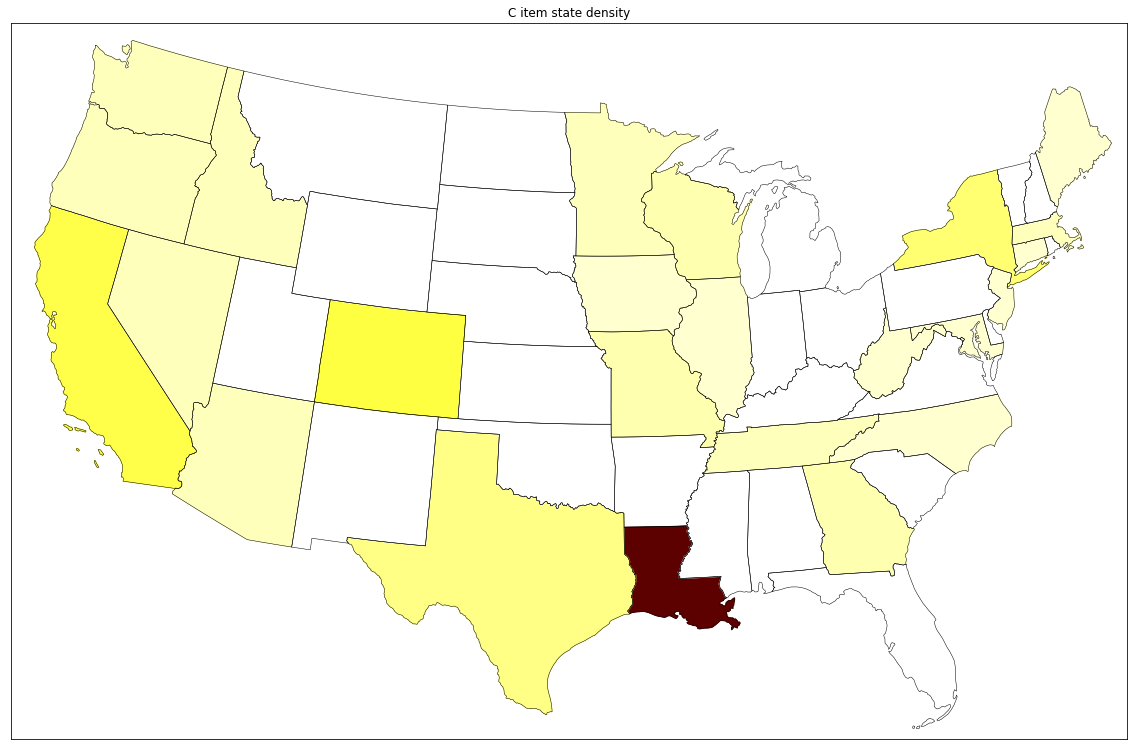

In [16]:
plt.title('C item state density')

plt.show()